In [1]:
import numpy as np
from time import time

### 1 Why not use loop
---

#### 1.1 Arrays are mutable

In [2]:
x_array = np.arange(5)
x_array

array([0, 1, 2, 3, 4])

In [3]:
x_array[0] = 99
x_array

array([99,  1,  2,  3,  4])

In [4]:
x_array[3:6] = [99,99] # this is permissable since the array returned by the slice is of the same shape as the assignment array
x_array

array([99,  1,  2, 99, 99])

#### 1.2 Loops are slow

In [5]:
bigmatrix = np.random.random((1000,2000))
bigmatrix.size

2000000

In [6]:
# A loop based computation of the sum of the max of all rows

def sum_of_max_loop(bigmatrix):
    
    m,n = bigmatrix.shape
    
    maxValues = np.zeros(shape=(m,))
    
    for i in range(m):
        for j in range(n):
            if(bigmatrix[i,j] > maxValues[i]):
                maxValues[i] = bigmatrix[i,j]
    
    sum_of_row_maxes = 0
    for i in range(m):
        sum_of_row_maxes += maxValues[i]
    
    return sum_of_row_maxes

In [7]:
start = time()
sum_of_row_maxes_loop = sum_of_max_loop(bigmatrix=bigmatrix)
duration_loop = time() - start

print(f"sum_of_max_loop = {sum_of_row_maxes_loop}")
print(f"took: {duration_loop:.4f} seconds.")

sum_of_max_loop = 999.4980218874693
took: 0.4663 seconds.


#### 1.3 Vectorized computation

In [23]:
def sum_of_max_vec(bigmatrix):
    maxValues = np.max(bigmatrix, axis=1)
    return maxValues.sum()

In [24]:
start = time()
sum_of_row_maxes_vec = sum_of_max_vec(bigmatrix)
duration_vec = time()-start

print(f"sum_of_max_vec = {sum_of_row_maxes_vec}")
print(f"took: {duration_vec:.4f} seconds")

sum_of_max_vec = 999.4980218874696
took: 0.0017 seconds


In [25]:
print(f"Therefore vectorized computation is roughly {duration_loop/duration_vec} times faster")

Therefore vectorized computation is roughly 253.8277571251549 times faster


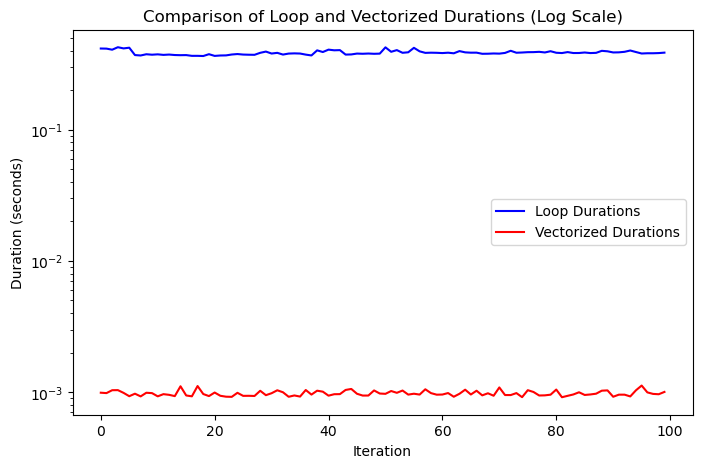

In [26]:
import matplotlib.pyplot as plt

x = np.arange(start=0, stop=100, step=1)
loop_durations = np.zeros_like(x, dtype=float)
vec_durations = np.zeros_like(x, dtype=float)


for i in range(100):
    
    start = time()
    sum_of_max_loop(bigmatrix)
    duration_loop = time() - start
    loop_durations[i] = duration_loop #round(duration_loop, ndigits=4)
    
    start = time()
    sum_of_max_vec(bigmatrix)
    duration_vec = time() - start
    vec_durations[i] = duration_vec #round(duration_vec, ndigits=4)

plt.figure(figsize=(8, 5))
plt.plot(x, loop_durations, label="Loop Durations", color='blue')
plt.plot(x, vec_durations, label="Vectorized Durations", color='red')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Duration (seconds)')
plt.title('Comparison of Loop and Vectorized Durations (Log Scale)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

- values closer to 0 appear appear on the plot as increasingly negative powers of 10
    - log_10(0.1) = -1 so the plot would label this value 10^-1
    - log_10(0.01) = -2 so the plot would label this value 10^-2
    - etc...

### 2 UFunc: Universal Functions
---

#### 2.1 Unary ufunc

- ufuncs are applied to the *entire* array efficiently utilizing highly optimized low level execution plans
- a unary function is a function with a single input
- when applied to a multidimensional numpy array, all elements are mapped to an output array organized in the same shape as the input array

In [27]:
# arbitrarily shaped ndarray

x = np.random.uniform(-100, 100, (3,2,2))
x = x.round(2)
print(f"{x}\n\nshape = {x.shape}")

[[[ -2.14  34.2 ]
  [ -2.14 -99.87]]

 [[-23.04  12.16]
  [ 57.06 -95.44]]

 [[-71.25 -30.27]
  [-61.92  50.58]]]

shape = (3, 2, 2)


In [28]:
print('x =\n', x)
print(f'|x| = \n{np.abs(x)}\n')     # absolute value of each element
print('x + 1 =\n', x + 1)      # addition
print('x - 1 =\n', x - 1)      # subtraction
print('x * 2 =\n', x * 2)      # multiplication
print('x // 2 =\n', x // 2)     # integer division
print('x ** 2 =\n', x ** 2)     # square
print('x % 2 =\n', x % 2)      # modulo  
print('1 / x =\n', 1 / x)      # division
print(f"x / (100 * 2 * pi) = \n{x / 100 * 2 * np.pi}\n")    # chain of operations
print(f"sin(x) = \n{np.sin(x)}\n")      # sine of x
print(f"x**2 = \n{np.power(x,2)}\n")    # x**2
print(f"sort(x) = \n{np.sort(x)}\n")    # sort x
print(f"sign(x) = \n{np.sign(x)}\n")    # replace each element with 1 or -1 based on its sign

x =
 [[[ -2.14  34.2 ]
  [ -2.14 -99.87]]

 [[-23.04  12.16]
  [ 57.06 -95.44]]

 [[-71.25 -30.27]
  [-61.92  50.58]]]
|x| = 
[[[ 2.14 34.2 ]
  [ 2.14 99.87]]

 [[23.04 12.16]
  [57.06 95.44]]

 [[71.25 30.27]
  [61.92 50.58]]]

x + 1 =
 [[[ -1.14  35.2 ]
  [ -1.14 -98.87]]

 [[-22.04  13.16]
  [ 58.06 -94.44]]

 [[-70.25 -29.27]
  [-60.92  51.58]]]
x - 1 =
 [[[  -3.14   33.2 ]
  [  -3.14 -100.87]]

 [[ -24.04   11.16]
  [  56.06  -96.44]]

 [[ -72.25  -31.27]
  [ -62.92   49.58]]]
x * 2 =
 [[[  -4.28   68.4 ]
  [  -4.28 -199.74]]

 [[ -46.08   24.32]
  [ 114.12 -190.88]]

 [[-142.5   -60.54]
  [-123.84  101.16]]]
x // 2 =
 [[[ -2.  17.]
  [ -2. -50.]]

 [[-12.   6.]
  [ 28. -48.]]

 [[-36. -16.]
  [-31.  25.]]]
x ** 2 =
 [[[4.5796000e+00 1.1696400e+03]
  [4.5796000e+00 9.9740169e+03]]

 [[5.3084160e+02 1.4786560e+02]
  [3.2558436e+03 9.1087936e+03]]

 [[5.0765625e+03 9.1627290e+02]
  [3.8340864e+03 2.5583364e+03]]]
x % 2 =
 [[[1.86 0.2 ]
  [1.86 0.13]]

 [[0.96 0.16]
  [1.06 0.56]]

 

### 2.2 Binary ufunc
---

- binary ufunc processes two arrays A and B in their entirety
- input arrays must have the same or boradcast-compatible shapes
- the output array has the same (post-broadcast if applicable) shape as the input arrays
- each element in the output array is calculated using pairs of corresponding elements in the input arrays

In [29]:
A = np.arange(1, 1+12).reshape(3,4)
B = np.arange(10, 10+12).reshape(3,4) # this is a good way to ensure each array will have +# elements

print("A =\n", A)
print("B =\n", B)

A =
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
B =
 [[10 11 12 13]
 [14 15 16 17]
 [18 19 20 21]]


In [30]:

print("A + B = \n", A+B)
print("B / A = \n", B/A)
print("B / A (using np.divide) = \n", np.divide(B,A))
print("B // A =\n", B // A)
print("B // A (using np.floor_divide) = \n", np.floor_divide(B,A))
print("B ** A =\n", B ** A)
print("B ** A (using np.power) =\n", np.power(B,A))

x = np.arange(-2,3)
y = np.random.randn(5)
print('x =', x)
print('y =', y, '\n')
print('np.add(x,y) =', np.add(x,y))                # element-wise addition       x + y
print('np.subtract(x,y) =', np.subtract(x,y))      # element-wise subtraction    x - y
print('np.multiply(x,y) =', np.multiply(x,y))      # element-wise multiplication x * y
print('np.divide(x,y) =', np.divide(x,y))          # element-wise division       x / y
print('np.maximum(x,y) =', np.maximum(x,y))        # element-wise maximum        max(x,y)

A + B = 
 [[11 13 15 17]
 [19 21 23 25]
 [27 29 31 33]]
B / A = 
 [[10.          5.5         4.          3.25      ]
 [ 2.8         2.5         2.28571429  2.125     ]
 [ 2.          1.9         1.81818182  1.75      ]]
B / A (using np.divide) = 
 [[10.          5.5         4.          3.25      ]
 [ 2.8         2.5         2.28571429  2.125     ]
 [ 2.          1.9         1.81818182  1.75      ]]
B // A =
 [[10  5  4  3]
 [ 2  2  2  2]
 [ 2  1  1  1]]
B // A (using np.floor_divide) = 
 [[10  5  4  3]
 [ 2  2  2  2]
 [ 2  1  1  1]]
B ** A =
 [[              10              121             1728            28561]
 [          537824         11390625        268435456       6975757441]
 [    198359290368    6131066257801  204800000000000 7355827511386641]]
B ** A (using np.power) =
 [[              10              121             1728            28561]
 [          537824         11390625        268435456       6975757441]
 [    198359290368    6131066257801  204800000000000 735582751138664

#### Important Statistical Methods

In [31]:
y = np.array([-3.2, -1.4, 0.4, 2.5, 3.4])    
print('y =', y, '\n')

print("Min =", np.min(y))             # min 
print("Max =", np.max(y))             # max 
print("Average =", np.mean(y))        # mean/average
print("Std deviation =", np.std(y))   # standard deviation
print("Sum =", np.sum(y))             # sum 

y = [-3.2 -1.4  0.4  2.5  3.4] 

Min = -3.2
Max = 3.4
Average = 0.34000000000000014
Std deviation = 2.432776191925595
Sum = 1.7000000000000006


#### Important Linear Algebra Operations

In [32]:
X = np.random.randn(2,3)                         # create a 2 x 3 random matrix
print('X =\n', X, '\n')
print('Transpose of X, X.T =\n', X.T, '\n')      # matrix transpose operation X^T

y = np.random.randn(3) # random vector 
print('y =', y, '\n')

print('Matrix-vector multiplication')
print('X.dot(y) =\n', X.dot(y), '\n')            # matrix-vector multiplication  X * y

print('Matrix-matrix product')
print('X.dot(X.T) =', X.dot(X.T))        # matrix-matrix multiplication  X * X^T
print('\nX.T.dot(X) =\n', X.T.dot(X))      # matrix-matrix multiplication  X^T * X

X =
 [[ 0.19209126  0.4772284   0.71724254]
 [-0.97989833  0.40741276  0.60020344]] 

Transpose of X, X.T =
 [[ 0.19209126 -0.97989833]
 [ 0.4772284   0.40741276]
 [ 0.71724254  0.60020344]] 

y = [-0.71018344 -0.77406685 -0.39193674] 

Matrix-vector multiplication
X.dot(y) =
 [-0.78694042  0.14530108] 

Matrix-matrix product
X.dot(X.T) = [[0.77908286 0.43669048]
 [0.43669048 1.48643007]]

X.T.dot(X) =
 [[ 0.9970998  -0.30755168 -0.45036233]
 [-0.30755168  0.3937321   0.58681905]
 [-0.45036233  0.58681905  0.87468103]]


In [33]:
X = np.random.randn(5,3)
print('X =\n', X, '\n')

C = X.T.dot(X)               # C = X^T * X is a square matrix
print('C = X.T.dot(X) =\n', C, '\n')

invC = np.linalg.inv(C)      # inverse of a square matrix
print('Inverse of C = np.linalg.inv(C)\n', invC, '\n')

detC = np.linalg.det(C)      # determinant of a square matrix
print('Determinant of C = np.linalg.det(C) =', detC)

S, U = np.linalg.eig(C)      # eigenvalue S and eigenvector U of a square matrix
print('Eigenvalues of C =\n', S)
print('Eigenvectors of C =\n', U)

X =
 [[ 0.2573096   0.8497162   0.33750051]
 [ 0.63955394  0.46525147  0.72540965]
 [ 0.72934863  1.45589266 -0.05850996]
 [-0.69090942 -0.92212733  0.80615034]
 [ 0.72972992 -1.31448924  2.64009547]] 

C = X.T.dot(X) =
 [[ 2.01704848  1.25593119  1.87768636]
 [ 1.25593119  5.63630077 -3.67465701]
 [ 1.87768636 -3.67465701  8.26353163]] 

Inverse of C = np.linalg.inv(C)
 [[ 2.00791758 -1.04900478 -0.92272561]
 [-1.04900478  0.79789597  0.59317205]
 [-0.92272561  0.59317205  0.59445445]] 

Determinant of C = np.linalg.det(C) = 16.471117050792675
Eigenvalues of C =
 [ 0.32317388  4.66249691 10.93121009]
Eigenvectors of C =
 [[-0.78940364  0.60620802  0.09671469]
 [ 0.46432351  0.69269061 -0.55189074]
 [ 0.40155396  0.39075765  0.82828913]]


### 2.3 Broadcasting
---

- if $A.shape \neq B.shape$
    1. runtime error

    2. **manually** adjust the shape using `np.reshape` or `np.repeat`
    
    3. **broadcasting** is applied using the following rules:
    
        - if `len(A.shape)` $\neq$ `len(B.shape)` then the dimensions of the smaller array will be compared to those of the larger array **right-to-left** 
        
        - leading dimensions of size 1 will be prepended to the smaller array until it is the same size as the larger array
        
        - if there is a dimension mismatch where one of the axis has size 1, this axis will be repeated to match the larger dimension size

        - if there is a dimension size mismatch and none of the dimensions have size=1, this will cause error
    

In [34]:
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [35]:
B = np.array([10,20,30,40])

In [36]:
A + B

array([[11, 22, 33, 44],
       [15, 26, 37, 48],
       [19, 30, 41, 52]])

In [37]:
# first np.newaxis was automatically invoked to increase the dimension of B by 1
B[np.newaxis,:]
# since B.shape[axis = 1] == A.shape[axis = 1], np.repeat is used to set B.shape[axis=0] = A.shape[axis=0]
np.repeat(B[np.newaxis,:],3,axis=0)
# B has now been broadcasted appropriately allowing for the addition A + B to be possible
# A + np.repeat(B[np.newaxis,:],3,axis=0)

array([[10, 20, 30, 40],
       [10, 20, 30, 40],
       [10, 20, 30, 40]])

In [44]:
a = np.random.random((1,2,3,4,5))
print(a.shape)
b = np.ones((1,2,3))
print(b.shape)

print((a+b).shape)


(1, 2, 3, 4, 5)
(1, 2, 3)


ValueError: operands could not be broadcast together with shapes (1,2,3,4,5) (1,2,3) 